In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import warnings
warnings.filterwarnings("ignore")

image_dir = os.path.join(os.getcwd(), '..', 'data', 'cric_cropped', 'Base balanceada dividida', '6 classes')
folders = ['Teste', 'Treino', 'Validacao']

# Creating Pixels DF

In [2]:
dfs = [[] for i in range(6)]

for folder in folders:
    for path in os.listdir(os.path.join(image_dir, folder)):
        if os.path.isfile(os.path.join(image_dir, folder, path)):
            img = Image.open(os.path.join(image_dir, folder, path))
            img_array = np.array(img)
            img_array = img_array.reshape(img_array.shape[0] * img_array.shape[1], img_array.shape[2])
            
            n, c, ext = path.split('_')
            c = int(c)

            dfs[c].append(pd.DataFrame(img_array))
            print('Done with', path)

pixel_dfs = [pd.concat(df).reset_index(drop=True) for df in dfs]
pixel_dfs[0]

Done with 0_0_.png
Done with 100_0_.png
Done with 101_0_.png
Done with 102_0_.png
Done with 103_0_.png
Done with 104_0_.png
Done with 105_0_.png
Done with 106_0_.png
Done with 107_0_.png
Done with 108_1_.png
Done with 109_1_.png
Done with 10_0_.png
Done with 110_1_.png
Done with 111_1_.png
Done with 112_1_.png
Done with 113_1_.png
Done with 114_1_.png
Done with 115_1_.png
Done with 116_1_.png
Done with 117_1_.png
Done with 118_1_.png
Done with 119_1_.png
Done with 11_0_.png
Done with 120_1_.png
Done with 121_1_.png
Done with 122_1_.png
Done with 123_1_.png
Done with 124_1_.png
Done with 125_1_.png
Done with 126_1_.png
Done with 127_1_.png
Done with 128_1_.png
Done with 129_1_.png
Done with 12_0_.png
Done with 130_1_.png
Done with 131_1_.png
Done with 132_1_.png
Done with 133_1_.png
Done with 134_1_.png
Done with 135_1_.png
Done with 136_1_.png
Done with 137_1_.png
Done with 138_1_.png
Done with 139_1_.png
Done with 13_0_.png
Done with 140_1_.png
Done with 141_1_.png
Done with 142_1_.pn

,0,1,2
0,210,214,199
1,208,213,197
2,211,216,198
3,211,214,202
4,209,210,202
...,...,...,...
6528595,205,206,175
6528596,207,207,175
6528597,206,203,172
6528598,206,201,168


In [3]:
import numba

color_map = {
    'violet': [148, 0, 211],
    'blue': [0, 0, 255],
    'green': [0, 255, 0],
    'yellow': [255, 255, 0],
    'orange': [255, 127, 0],
    'red': [255, 0, 0],

    'black': [0, 0, 0],
    'white': [255, 255, 255]
}

@numba.jit
def classify_color(v1):
    min_dist = -1
    for c, v in color_map.items():
        dist = abs(np.linalg.norm(v1 - v))
        if min_dist == -1 or dist < min_dist:
            min_dist = dist
            color = c
    return color

def classify_color_df(row):
    row['color'] = classify_color(row.to_numpy())
    return row

In [4]:
for k, df in enumerate(pixel_dfs):
    colors = []
    for i, color in df.iterrows():
        colors.append(classify_color(color.values))
        print(f'DF {k}: {(i / len(df)) * 100: .2f}% Done', end='\r')
    df['color'] = colors
    df.to_csv(f'Pixels_{k}.csv', index=False)

# Visualizing Colors

In [5]:
dfs = []
for i in range(6):
    temp = pd.read_csv(f'Pixels_{i}.csv')
    temp['class'] = i
    dfs.append(temp)
df = pd.concat(dfs)
df.head()

,0,1,2,color,class
0,210,214,199,white,0
1,208,213,197,white,0
2,211,216,198,white,0
3,211,214,202,white,0
4,209,210,202,white,0


In [6]:
vis_df = (df.groupby(['color', 'class']).count() / df.groupby(['class']).count()) * 100
vis_df = vis_df.iloc[:, [0]]
vis_df.reset_index(inplace=True)

In [7]:
color_map = {
    'violet': '#9400D3',
    'blue': '#0000FF',
    'green': '#00FF00',
    'yellow': '#FFFF00',
    'orange': '#FF7F00',
    'red': '#FF0000',

    'black': '#000000',
    'white': '#FFFFFF'
}

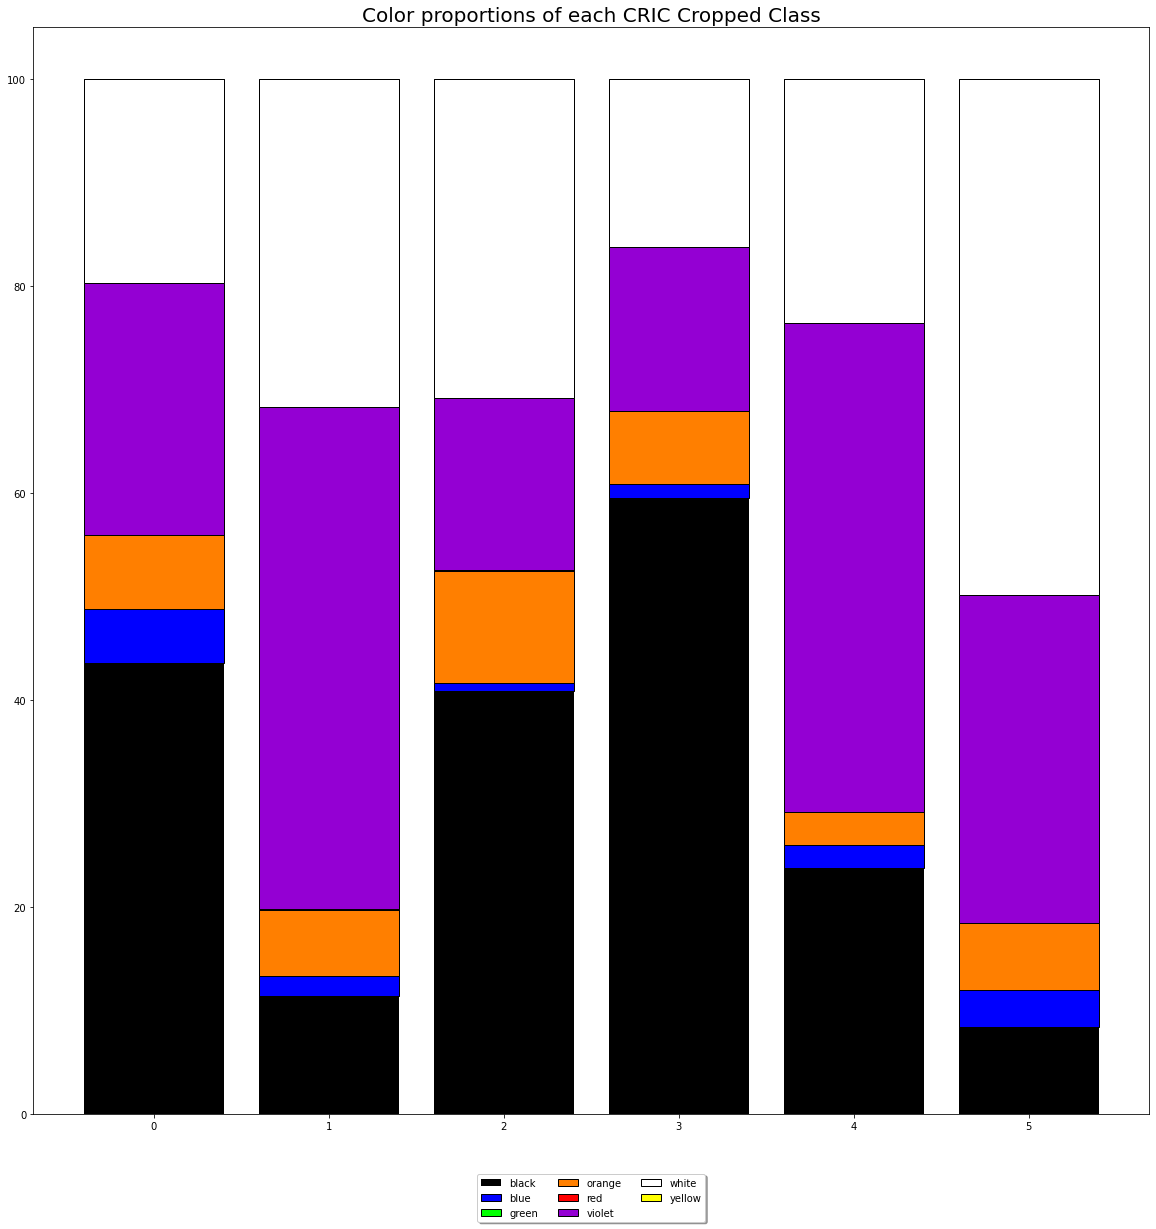

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
prev_color = []
for color in vis_df['color'].unique():
    temp = vis_df[vis_df['color'] == color]
    color_rgb = color_map[color]
    if prev_color:
        prev_df = vis_df[vis_df['color'] == prev_color[0]]
        v = prev_df['0'].values
        for k in range(1, len(prev_color)):
            prev_df = vis_df[vis_df['color'] == prev_color[k]]
            v += prev_df['0'].values
        plt.bar(temp['class'], temp['0'], bottom=v, color=color_rgb, edgecolor='black', label=color)
    else:
        plt.bar(temp['class'], temp['0'], color=color_rgb, label=color)
    prev_color.append(color)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, fancybox=True, shadow=True)
plt.title("Color proportions of each CRIC Cropped Class", fontsize=20)
plt.savefig('color_analysis.jpg', Transparent=False)
plt.show()

In [9]:
color_map = {
    'violet': [148, 0, 211],
    'blue': [0, 0, 255],
    'green': [0, 255, 0],
    'yellow': [255, 255, 0],
    'orange': [255, 127, 0],
    'red': [255, 0, 0],

    'black': [0, 0, 0],
    'white': [255, 255, 255]
}

def classify_color(v1):
    min_dist = -1
    for c, v in color_map.items():
        dist = abs(np.linalg.norm(v1 - v))
        if min_dist == -1 or dist < min_dist:
            min_dist = dist
            color = c
    return color

def classify_color_df(row):
    row['color'] = classify_color(row.to_numpy())
    return row

def extract_image_colors(image_path: str):
    image = Image.open(image_path)
    img_array = np.array(image)
    img_array = img_array.reshape(img_array.shape[0] * img_array.shape[1], img_array.shape[2])

    pixel_df = pd.DataFrame(img_array)

    colors = []
    alt_r = []
    alt_g = []
    alt_b = []
    for i, row in pixel_df.iterrows():
        c = classify_color(row.values)
        colors.append(c)
        c_rgb = color_map[c]
        alt_r.append(c_rgb[0])
        alt_g.append(c_rgb[1])
        alt_b.append(c_rgb[2])
        print(f'Done: {i}/{len(pixel_df)}', end='\r')
        
    pixel_df['color'] = colors
    pixel_df['Alt_R'] = alt_r
    pixel_df['Alt_G'] = alt_g
    pixel_df['Alt_B'] = alt_b

    vis_df = pixel_df.groupby(['color']).count()
    # vis_df = (pixel_df.groupby(['color']).count() / pixel_df.count()) * 100
    vis_df = vis_df.iloc[:, [0]]
    vis_df.reset_index(inplace=True)

    sum_df = vis_df[0].sum()

    palette = np.zeros([sum_df, 100, 3])
    total_left = 0
    for color in vis_df['color'].unique():
        temp = vis_df[vis_df['color'] == color]
        color_rgb = color_map[color]
        palette[total_left:total_left + temp[0].values[0], :] = color_rgb
        total_left += temp[0].values[0]

    # Create Altered Image
    alt_img = np.zeros(img_array.shape)
    for i, row in pixel_df.iterrows():
        alt_img[i] = [row['Alt_R'], row['Alt_G'], row['Alt_B']]

    alt_img = alt_img.reshape(image.height, image.width, 3)

    # Visualize
    fig, ax = plt.subplots(1, 3, figsize=(17, 8))
    
    ax[0].imshow(image)
    ax[1].imshow(alt_img)
    ax[2].imshow(palette)

    plt.show()

    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


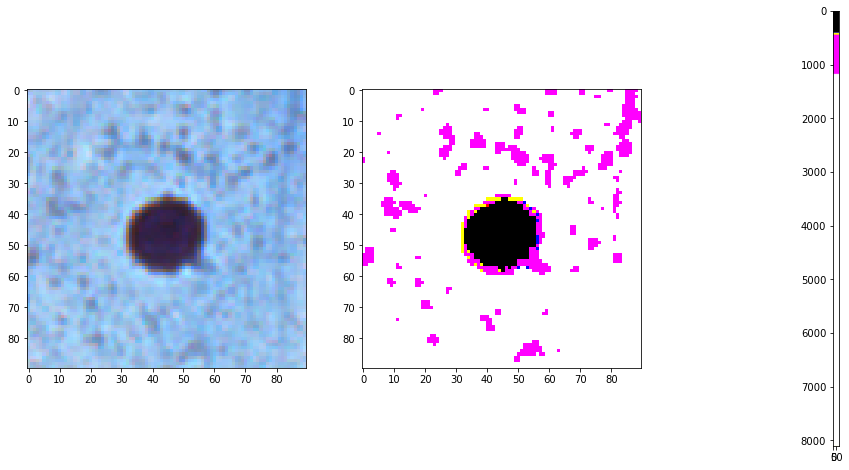

In [11]:
extract_image_colors(r'C:\Users\paolo\OneDrive\Desktop\Projects\Drcadx\data\cric_cropped\Base balanceada dividida\6 classes\Validacao\790_5_.png')

# Visualizing Colors per Segment